In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import highlight_text 
from PIL import Image

In [10]:
team = 'Nordsjælland'
games = 32
league = 'Superligaen'

In [3]:
df = pd.read_excel(f"C:\\Users\\George\\Documents\\Football Analytics\\Data\\{team} match data.xlsx")

In [5]:
df.rename(columns={'team_xG':'xG','opponent_xG':'xGA'}, inplace=True)

In [7]:
df['xGSMA'] = df['xG'].rolling(window=5).mean()

In [8]:
df['xGASMA'] = df['xGA'].rolling(window=5).mean()

In [9]:
X = df['Match']
Y_for = df['xGSMA']
Y_ag = df['xGASMA']


Text(51.27777777777777, 0.5, 'xG/xGA')

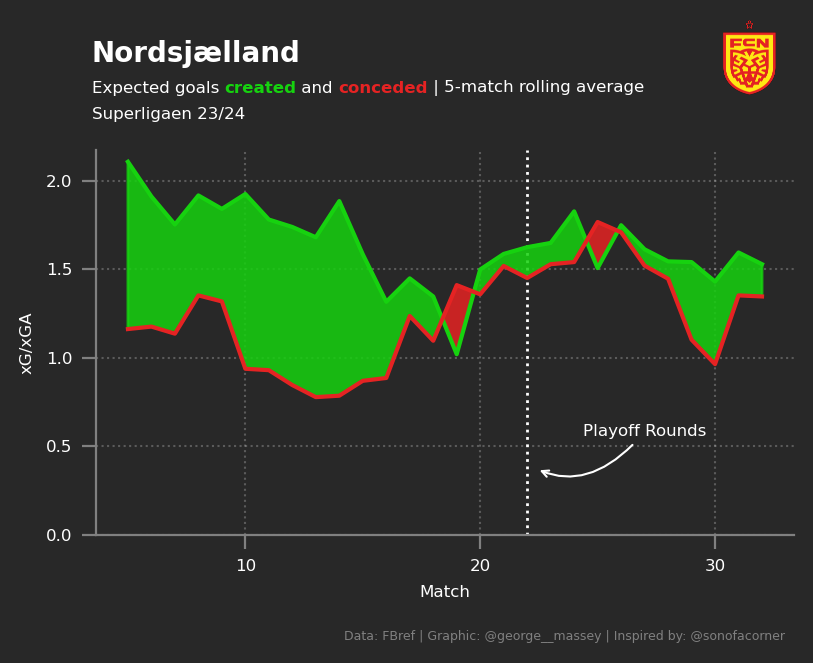

In [17]:
fig = plt.figure(figsize=(4.5, 2.5), dpi = 200, facecolor = "#282828")
ax = plt.subplot(111, facecolor = "#282828")

# Remove top & right spines and change the color.
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")

# Set the grid
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    alpha = 0.3,
    color = "lightgrey"
)

line_1 = ax.plot(X, Y_for, color = "#16D20F", zorder = 4)
line_2 = ax.plot(X, Y_ag, color = "#E52323", zorder = 4)

ax.set_ylim(0)
 #Add a line to mark the division between seasons
ax.plot(
    [22,22], # 38 games per season
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    ls = ":",
    lw = 1,
    color = "white",
    zorder = 2
)

# Annotation with data coordinates and offset points.
ax.annotate(
    xy = (22, .4),
    xytext = (20, 10),
    textcoords = "offset points",
    text = "Playoff Rounds",
    size = 6,
    color = "white",
    arrowprops=dict(
        arrowstyle="->", shrinkA=0, shrinkB=5, color="white", linewidth=0.75,
        connectionstyle="angle3,angleA=50,angleB=-30"
    ) # Arrow to connect annotation
)
# Fill between
ax.fill_between(
    X, 
    Y_ag,
    Y_for, 
    where = Y_for >= Y_ag, 
    interpolate = True,
    alpha = 0.85,
    zorder = 3,
    color = line_1[0].get_color()
)

ax.fill_between(
    X, 
    Y_ag,
    Y_for, 
    where = Y_ag > Y_for, 
    interpolate = True,
    alpha = 0.85,
    color = line_2[0].get_color()
)

# Customize the ticks to match spine color and adjust label size.
ax.tick_params(
    color = "grey", 
    length = 5, 
    which = "major", 
    labelsize = 6,
    labelcolor = "white",
    zorder = 3
)

# Set x-axis major tick positions to only 19 game multiples.
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
# Set y-axis major tick positions to only 0.5 xG multiples.
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

# Title and subtitle for the legend
highlight_text.fig_text(
    x = 0.12, y = 1.1,
    s = f"{team}",
    color = "white",
    weight = "bold",
    size = 10,
    #family = "DM Sans", #This is a custom font !!
    #annotationbbox_kw={"xycoords": "figure fraction"}
)

highlight_text.fig_text(
    x = 0.12, y = 1.02,
    s = f"Expected goals <created> and <conceded> | 5-match rolling average\n{league} 23/24",
    highlight_textprops = [
        {"color": line_1[0].get_color(), "weight": "bold"},
        {"color": line_2[0].get_color(), "weight": "bold"}
    ],
    color = "white",
    size = 6,
    #annotationbbox_kw={"xycoords": "figure fraction"}
)
fig.text(0.4, -0.1, "Data: FBref | Graphic: @george__massey | Inspired by: @sonofacorner", size = 4.5, color = "grey")
badge_url = f"C:/Users/George/Documents/Football Analytics/Team Logos/{team}_logo.png"

logo_ax = fig.add_axes([0.75, .99, 0.2, 0.15], zorder=1)
club_icon = Image.open(badge_url)
logo_ax.imshow(club_icon)
logo_ax.axis("off")
ax.set_xlabel('Match', color = "white", fontsize = 6)
ax.set_ylabel('xG/xGA', color = "white", fontsize = 6)